# Wes Roberts
## Second set of exact diagonalization notes

## DMI on a spin chain

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

# PARAMETERS
nsites = 3

#Single site operators
sz0 = np.zeros(shape=(2,2)) # single site Sz
splus0 = np.zeros(shape=(2,2)) # single site S+
sz0[0,0]         = -0.5
sz0[1,1]         =  0.5
splus0[1,0]      =  1.0

term_szsz = np.zeros(shape=(4,4)) #auxiliary matrix to store Sz.Sz
term_szsz = np.kron(sz0,sz0)

term_spsm = np.zeros(shape=(4,4)) #auxiliary matrix to store 1/2 S+.S-
term_spsm = np.kron(splus0,np.transpose(splus0))*0.5
term_spsm += np.transpose(term_spsm)

h12 = term_szsz+term_spsm

H = np.zeros(shape=(2,2))
for i in range(1,nsites):

    diml = 2**(i-1)        # 2^i
    dim = diml*2
    
    print ("ADDING SITE ",i," DIML= ",diml)

    Ileft = np.eye(diml)
    Iright = np.eye(2)

    # We add the term for the interaction S_i.S_{i+1}

    aux = np.zeros(shape=(dim,dim))
    aux = np.kron(H,Iright)
    H = aux

    H = H + np.kron(Ileft,h12)

w, v = np.linalg.eigh(H) #Diagonalize the matrix
print(w) # Looks like w must be the eigenvalues, because the n = 2 case is the singlet and triplet


ADDING SITE  1  DIML=  1
ADDING SITE  2  DIML=  2
[-1.00000000e+00 -1.00000000e+00 -5.43456339e-17 -5.43456339e-17
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01]


Analytical task: write an analytical iterative expression for the full Hamiltonian. Maybe start with just the DMI. Could even solve it one term at a time.

In [2]:
# PARAMETERS
nsites = 2
J = 1.
Dx = .1j  # Typically DMI is perturbative, so it's smaller than J
Dy = .1
Dz = (.1j)

# Single site operators: DMI contains the same basic ingredients as Heisenberg.
sz0 = np.zeros(shape=(2,2)) 
splus0 = np.zeros(shape=(2,2)) 
sz0[0,0]         = -0.5
sz0[1,1]         =  0.5
splus0[1,0]      =  1.0
sminus0 = np.transpose(splus0)

# Now build the two-site operators

# Start with Ising term

Ising = np.zeros(shape=(4,4)) #auxiliary matrix to store Sz.Sz
Ising = np.kron(sz0,sz0)

# Next JDp and JDm: these account for Dz and Heisenberg

JDp = np.zeros(shape=(2,2))
JDm = np.zeros(shape=(2,2))

JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

# Now add the Dx and Dy terms

DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

# Now assemble the whole two-site Hamiltonian

h2 = Ising + JDp + JDm + DMx + DMy

# Now write the loop for the many-body Hamiltonian

H = np.zeros(shape=(2,2))
for i in range(1,nsites):

    diml = 2**(i-1)        # 2^i
    dim = diml*2
    
    print ("ADDING SITE ",i," DIML= ",diml)

    Ileft = np.eye(diml)
    Iright = np.eye(2)


    aux = np.zeros(shape=(dim,dim))
    aux = np.kron(H,Iright)
    H = aux

    H = H + np.kron(Ileft,h2)
    
    
w, v = np.linalg.eigh(H) #Diagonalize the matrix
print(w)


d = 2**nsites

#Assemble ground state

ground = np.zeros(d, dtype=complex)

for i in range(d):
    ground[i] = v[i,0]

for i in range(d):
    print(ground[i])




ADDING SITE  1  DIML=  1
[-0.75744458  0.25        0.25        0.25744458]
(0.049448157760943315+0j)
(-0.47343870552893896+0.5228868632898821j)
(0.522886863289882-0.47343870552893863j)
(6.580418780690075e-18-0.04944815776094331j)


Would be interesting to plot the ground state energy against (1) the magnitude of D and (2) the direction of D

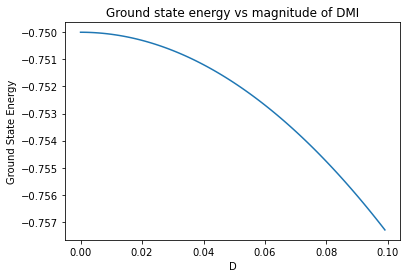

In [8]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
J = 1.


for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         = -0.5
    sz0[1,1]         =  0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(Dmag, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("D")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy vs magnitude of DMI");

#pyplot.plot(Dmag, splitting)




We see that for D small compared to J, the ground state energy is relatively insensitive to the size of D.

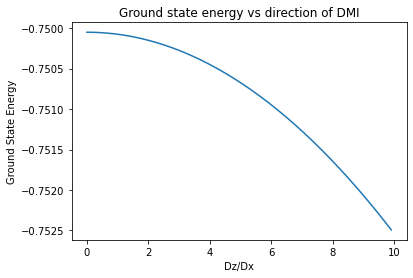

In [11]:
b = 100
a = 1

DzDx = np.zeros(b)
energy = np.zeros(b)
splitting = np.zeros(b)

nsites = 2
J = 1.


for j in range(b):
    DzDx[j] = j/10
    
    Dx = a*0.01j  
    Dy = a*0.01
    Dz = j*0.001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         = -0.5
    sz0[1,1]         =  0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(DzDx, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("Dz/Dx")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy vs direction of DMI");

#pyplot.plot(Dmag, splitting)




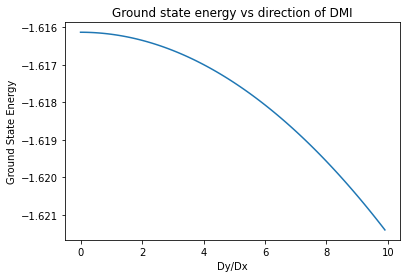

In [13]:
b = 100
a = 1

DzDx = np.zeros(b)
energy = np.zeros(b)
splitting = np.zeros(b)

nsites = 4
J = 1.


for j in range(b):
    DzDx[j] = j/10
    
    Dx = a*0.01j  
    Dy = j*0.001
    Dz = a*0.01j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         = -0.5
    sz0[1,1]         =  0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(DzDx, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("Dy/Dx")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy vs direction of DMI");

#pyplot.plot(Dmag, splitting)





Ground state energy seems to care more about the orientation of y than it does z.

In [16]:
b = 10
a = 1

DzDx = np.zeros(b)
energy = np.zeros(b)
splitting = np.zeros(b)

nsites = 2
J = 1.


for j in range(b):
    DzDx[j] = j/10
    
    Dx = a*0.01j  
    Dy = j*0.001
    Dz = a*0.01j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         = -0.5
    sz0[1,1]         =  0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    print(v[0,0])
    print(v[0,1])
    print(v[0,2])
    print(v[0,3])
    
    print('\n')
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


#pyplot.plot(DzDx, energy);
#print(energy)
#print(Dmag)
#pyplot.xlabel("D")
#pyplot.ylabel("Ground State Energy")
#pyplot.title("Ground state energy vs direction of DMI");

#pyplot.plot(Dmag, splitting)






(0.003535268775135115-0j)
(0.49852511653674947+0j)
(-0.7081473774445519+0j)
(-0.4999875017189044+0j)


(0.0035528998156411757+0j)
0j
(0.8653070084700507+0j)
(-0.5012296459663096+0j)


(0.0036052754871257297-0j)
(0.4694839576143619+0j)
(-0.7243499518588317+0j)
(-0.504865291710102+0j)


(0.0036909165058495986+0j)
(0.1095656026428882+0j)
(0.8527777134037627+0j)
(-0.5106387444903663+0j)


(0.0038075781571413735+0j)
(0.8552669065750698+0j)
0j
(-0.5181737361793707+0j)


(-0.003952513602195121+0j)
(0.09221131807055319+0j)
(-0.8448190901256488+0j)
(0.5270314558118769-0j)


(0.004122740786375953-0j)
(0.51058798548967+0j)
(-0.6716876624235524+0j)
(-0.5367667987403777+0j)


(0.004315266214594785+0j)
(-0.8371399004049246+0j)
0j
(0.5469718142898502-0j)


(0.004527244403914348-0j)
(0.6084913494820814+0j)
(-0.5649178851816472+0j)
(-0.5573020407871102+0j)


(0.004756073264525415+0j)
(0.43591054549633645+0j)
(-0.6985112306789024+0j)
(-0.5674869484910062+0j)




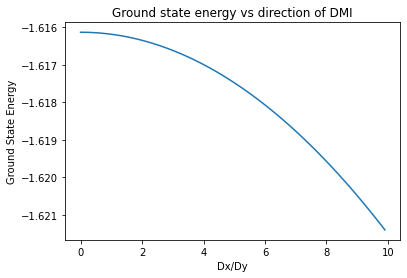

In [18]:
b = 100
a = 1

DzDx = np.zeros(b)
energy = np.zeros(b)
splitting = np.zeros(b)

nsites = 4
J = 1.


for j in range(b):
    DzDx[j] = j/10
    
    Dx = j*0.001j  
    Dy = a*0.01
    Dz = a*0.01j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         = -0.5
    sz0[1,1]         =  0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(DzDx, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("Dx/Dy")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy vs direction of DMI");

#pyplot.plot(Dmag, splitting)



We see that it treats x and y symmetrically, but z dependence is different.